# Libraries

In [12]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from imblearn.over_sampling import *
from imblearn.under_sampling import *

from sklearn.utils import *
from sklearn.model_selection import train_test_split


# Importing the dataset 

In [13]:
df = pd.read_csv(r"C:\Users\matth\0_BDMP\Datasets\3_Cleaned_Datasets\finalised_cleaned_dataset.csv")
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,...,SEX,AGE,DRIVER_VISION,UNIT_TYPE,VEHICLE_TYPE,CRASH_YEAR,CRASH_TIME,TIME_BINS,AGE_BINS,SPEED_BINS
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,"OVER $1,500",...,F,22.0,UNKNOWN,DRIVER,PASSENGER,2019,14:43:00,AFTERNOON,16-24,26-40
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,"OVER $1,500",...,M,56.0,NOT OBSCURED,DRIVER,PASSENGER,2019,14:43:00,AFTERNOON,> 55,26-40
2,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,"OVER $1,500",...,F,39.0,OTHER,DRIVER,SPORT UTILITY VEHICLE (SUV),2018,08:40:00,MORNING,36-55,26-40
3,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,"OVER $1,500",...,F,39.0,OTHER,DRIVER,PASSENGER,2018,08:40:00,MORNING,36-55,26-40
4,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,DRY,NO DEFECTS,"OVER $1,500",...,M,32.0,NOT OBSCURED,DRIVER,SPORT UTILITY VEHICLE (SUV),2018,08:40:00,MORNING,25-35,26-40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399212 entries, 0 to 1399211
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   POSTED_SPEED_LIMIT      1399212 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE  1399212 non-null  object 
 2   DEVICE_CONDITION        1399212 non-null  object 
 3   WEATHER_CONDITION       1399212 non-null  object 
 4   LIGHTING_CONDITION      1399212 non-null  object 
 5   FIRST_CRASH_TYPE        1399212 non-null  object 
 6   TRAFFICWAY_TYPE         1399212 non-null  object 
 7   ROADWAY_SURFACE_COND    1399212 non-null  object 
 8   ROAD_DEFECT             1399212 non-null  object 
 9   DAMAGE                  1399212 non-null  object 
 10  MOST_SEVERE_INJURY      1399212 non-null  int64  
 11  INJURIES_TOTAL          1399212 non-null  float64
 12  CRASH_HOUR              1399212 non-null  int64  
 13  CRASH_DAY_OF_WEEK       1399212 non-null  int64  
 14  LA

In [15]:
columns_to_remove = ['LATITUDE', 'LONGITUDE', 'CRASH_TIME', 'CRASH_YEAR', 'UNIT_TYPE', 'VEHICLE_TYPE', 'DEVICE_CONDITION', 'AGE']
df = df.drop(columns=columns_to_remove)
df.shape

(1399212, 18)

## Revising the Target Variable Distribution

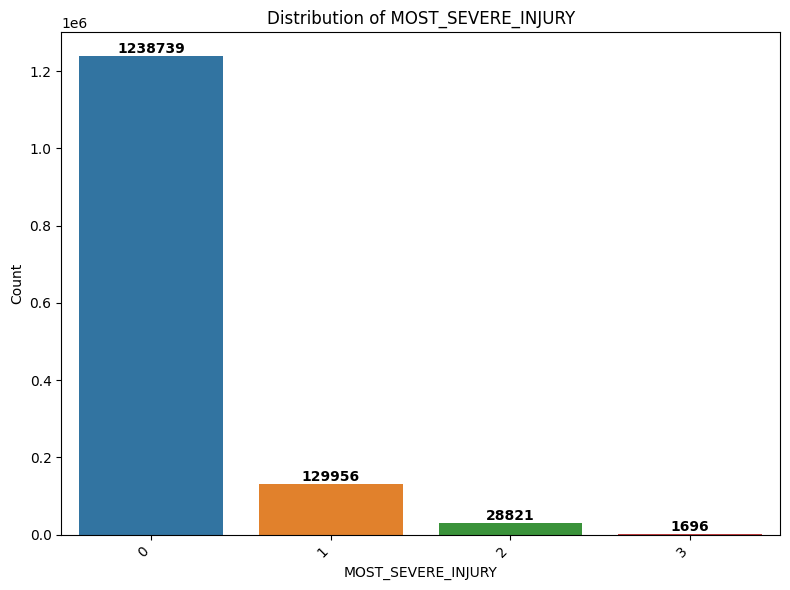

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Count the occurrences of each unique value in the 'MOST_SEVERE_INJURY' column
severity_counts = df['MOST_SEVERE_INJURY'].value_counts()

# Calculate the percentage of each unique value in the 'MOST_SEVERE_INJURY' column
severity_percentage = df['MOST_SEVERE_INJURY'].value_counts(normalize=True) * 100

# Combine the counts and percentages into a DataFrame for visualization
severity_distribution = pd.DataFrame({
    'Count': severity_counts,
    'Percentage': severity_percentage
})

# Plot the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=severity_distribution.index, y='Count', data=severity_distribution)
plt.xticks(rotation=45, ha='right')
plt.xlabel('MOST_SEVERE_INJURY')
plt.ylabel('Count')
plt.title('Distribution of MOST_SEVERE_INJURY')

# Adding data labels above each bar
for index, value in enumerate(severity_distribution['Count']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Feature Engineering

In [17]:
df.shape

(1399212, 18)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399212 entries, 0 to 1399211
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   POSTED_SPEED_LIMIT      1399212 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE  1399212 non-null  object 
 2   WEATHER_CONDITION       1399212 non-null  object 
 3   LIGHTING_CONDITION      1399212 non-null  object 
 4   FIRST_CRASH_TYPE        1399212 non-null  object 
 5   TRAFFICWAY_TYPE         1399212 non-null  object 
 6   ROADWAY_SURFACE_COND    1399212 non-null  object 
 7   ROAD_DEFECT             1399212 non-null  object 
 8   DAMAGE                  1399212 non-null  object 
 9   MOST_SEVERE_INJURY      1399212 non-null  int64  
 10  INJURIES_TOTAL          1399212 non-null  float64
 11  CRASH_HOUR              1399212 non-null  int64  
 12  CRASH_DAY_OF_WEEK       1399212 non-null  int64  
 13  SEX                     1399212 non-null  object 
 14  DR

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assume df is your DataFrame
# Categorical columns for one-hot encoding
categorical_columns = ['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
                       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 
                       'ROAD_DEFECT', 'DAMAGE', 'SEX', 'DRIVER_VISION', 'TIME_BINS', 'AGE_BINS', 'SPEED_BINS']

# Numerical columns for feature scaling
numerical_columns = ['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Apply feature scaling to numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_columns)

# Combine the encoded features, scaled features, and other columns
df = pd.concat([df.drop(categorical_columns + numerical_columns, axis=1), encoded_df, scaled_df], axis=1)

# Print the updated DataFrame with feature-engineered columns
print(df.head())


C:\Users\matth\anaconda3\envs\isolatedEnv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   MOST_SEVERE_INJURY  TRAFFIC_CONTROL_DEVICE_DELINEATORS  \
0                   0                                 0.0   
1                   0                                 0.0   
2                   0                                 0.0   
3                   0                                 0.0   
4                   0                                 0.0   

   TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   TRAFFIC_CONTROL_DEVICE_LANE USE MARKING  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   TRAFFIC_CONTROL_DEVICE_NO CONTROLS

# Handling Imbalanced Target Variable Classes

In [24]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your preprocessed DataFrame

# Separate features and target variable
X = df.drop('MOST_SEVERE_INJURY', axis=1)
y = df['MOST_SEVERE_INJURY']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Print class distribution to confirm balancing
print(balanced_df['MOST_SEVERE_INJURY'].value_counts())

# Now you can use 'balanced_df' for further modeling


MOST_SEVERE_INJURY
0    1238739
1    1238739
2    1238739
3    1238739
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already balanced your dataset

# Split the dataset into features (X) and target variable (y)
X = balanced_df.drop('MOST_SEVERE_INJURY', axis=1)
y = balanced_df ['MOST_SEVERE_INJURY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Display the features used in X_train
print(len(X_train.columns))


116


_______________________________________________________________________________________________________________________________

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
logreg_predictions = logreg.predict(X_test_scaled)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Print classification report
classification_rep = classification_report(y_test, logreg_predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    247600
           1       0.49      0.59      0.53    247688
           2       0.43      0.28      0.34    247691
           3       0.60      0.71      0.65    248013

    accuracy                           0.63    990992
   macro avg       0.63      0.63      0.62    990992
weighted avg       0.63      0.63      0.62    990992



In [13]:
import pickle
# Save the trained model to a file using pickle
with open('LR.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)


_______________________________________________________________________________________________________________________________

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test data
dt_predictions = decision_tree.predict(X_test_scaled)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Print classification report
classification_rep = classification_report(y_test, dt_predictions)
print(classification_rep)

Decision Tree Accuracy: 0.9815457642443127
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    247600
           1       0.97      0.97      0.97    247688
           2       0.98      0.98      0.98    247691
           3       1.00      1.00      1.00    248013

    accuracy                           0.98    990992
   macro avg       0.98      0.98      0.98    990992
weighted avg       0.98      0.98      0.98    990992



In [15]:
import pickle
# Save the trained model to a file using pickle
with open('DT.pkl', 'wb') as model_file:
    pickle.dump(decision_tree, model_file)

_______________________________________________________________________________________________________________________________

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a RandomForestClassifier with a specified number of trees (n_estimators)
random_forest_classifier = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees

# Fit the model on the training data
random_forest_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
rf_predictions = random_forest_classifier.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Print classification report
classification_rep = classification_report(y_test, rf_predictions)
print(classification_rep)


Random Forest Accuracy: 0.9902632917319212
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    247600
           1       0.97      0.99      0.98    247688
           2       0.99      0.99      0.99    247691
           3       1.00      1.00      1.00    248013

    accuracy                           0.99    990992
   macro avg       0.99      0.99      0.99    990992
weighted avg       0.99      0.99      0.99    990992



In [17]:
import pickle
# Save the trained model to a file using pickle
with open('RF.pkl', 'wb') as model_file:
    pickle.dump(random_forest_classifier, model_file)

_______________________________________________________________________________________________________________________________

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the test data
gnb_predictions = gnb.predict(X_test_scaled)

# Calculate accuracy
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("GNB Accuracy:", gnb_accuracy)

# Print classification report
classification_rep = classification_report(y_test, gnb_predictions)
print(classification_rep)


GNB Accuracy: 0.26985081615189627
              precision    recall  f1-score   support

           0       0.56      0.06      0.11    247600
           1       0.43      0.01      0.02    247688
           2       0.41      0.01      0.03    247691
           3       0.26      0.99      0.41    248013

    accuracy                           0.27    990992
   macro avg       0.42      0.27      0.14    990992
weighted avg       0.42      0.27      0.14    990992



In [41]:
import pickle
# Save the trained model to a file using pickle
with open('GNB.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

_______________________________________________________________________________________________________________________________

## Gradient Boosting

In [38]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

# Fit the model on the training data
lgbm.fit(X_train_scaled, y_train)

# Make predictions on the test data
lgbm_predictions = lgbm.predict(X_test_scaled)

# Calculate accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

# Print accuracy
print("Accuracy:", lgbm_accuracy)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.440151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20822
[LightGBM] [Info] Number of data points in the train set: 3963964, number of used features: 116
[LightGBM] [Info] Start training from score -1.386145
[LightGBM] [Info] Start training from score -1.386234
[LightGBM] [Info] Start training from score -1.386237
[LightGBM] [Info] Start training from score -1.386562
Accuracy: 0.7770839724235917


In [39]:
import pickle
# Save the trained model to a file using pickle
with open('LGB.pkl', 'wb') as model_file:
    pickle.dump(lgbm, model_file)

_______________________________________________________________________________________________________________________________

## XGBoost

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBClassifier with specified hyperparameters
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)  # You can adjust hyperparameters

# Fit the model on the training data
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
xgb_predictions = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Print classification report
classification_rep = classification_report(y_test, xgb_predictions)
print(classification_rep)

XGBoost Accuracy: 0.6757239210810986
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    247600
           1       0.53      0.64      0.58    247688
           2       0.50      0.31      0.38    247691
           3       0.66      0.81      0.73    248013

    accuracy                           0.68    990992
   macro avg       0.67      0.68      0.66    990992
weighted avg       0.67      0.68      0.66    990992



In [21]:
import pickle
# Save the trained model to a file using pickle
with open('XGB.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)

_______________________________________________________________________________________________________________________________

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=1000)

random_search_logreg = RandomizedSearchCV(
    logreg, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5
)

random_search_logreg.fit(X_train_scaled, y_train)

best_params_logreg = random_search_logreg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_logreg)


# Feature Importance for the best model

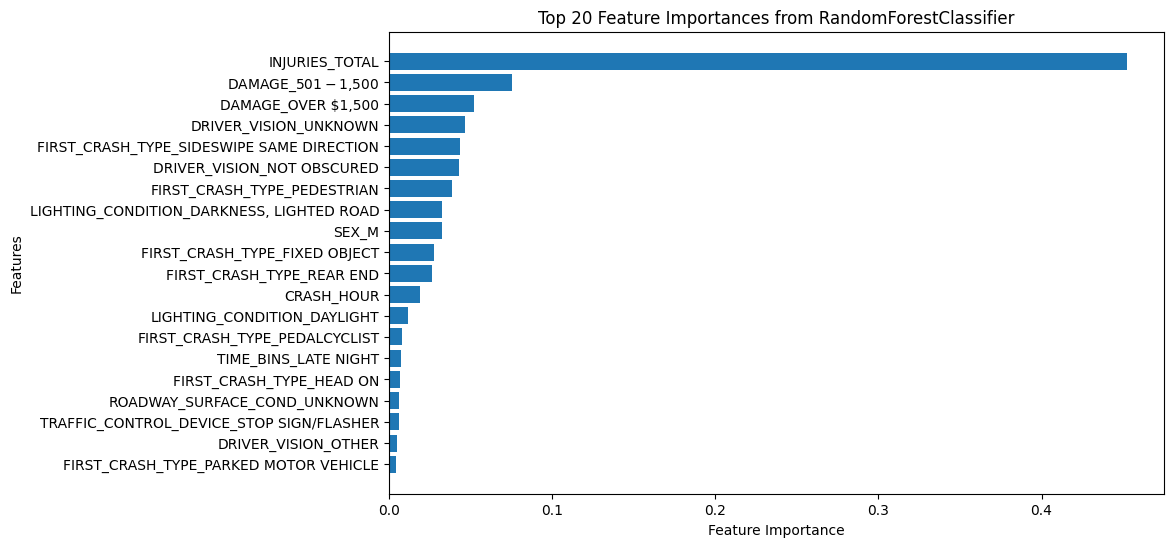

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train your RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Choose the top N features to display
top_n = 20  # Choose the number of top features you want to display

# Create a bar plot for top N feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[sorted_indices][:top_n][::-1])  # Reverse the order
plt.yticks(range(top_n), feature_names[sorted_indices][:top_n][::-1])  # Reverse the order
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Top {top_n} Feature Importances from RandomForestClassifier')
plt.show()


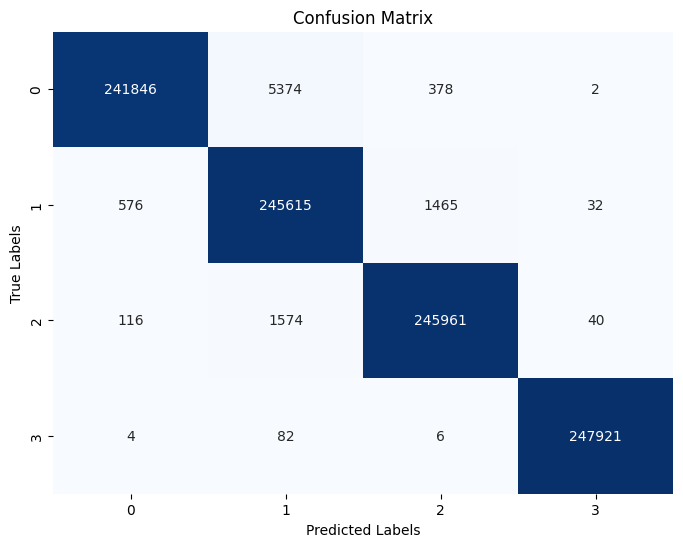

In [36]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

# Fit the model on the entire training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
logreg_predictions = logreg.predict(X_test_scaled)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Print classification report
classification_rep = classification_report(y_test, logreg_predictions)
print(classification_rep)


Cross-Validation Scores: [0.63233404 0.6318131  0.63198338 0.63203383 0.63218726]
Mean CV Accuracy: 0.6320703215561332
Standard Deviation of CV Accuracy: 0.00017791903469263992


KeyboardInterrupt: 

# Saving the Best model

In [ ]:
import pickle

# Save the model to disk
filename = 'best_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Model Evaluation

# Insights